In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!unzip '/content/gdrive/My Drive/DeepFashion/In-shop Clothes Retrieval Benchmark/Img/img.zip'

Streaming output truncated to the last 5000 lines.
   creating: img/WOMEN/Tees_Tanks/id_00005020/
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005020/06_7_additional.jpg  
   creating: img/WOMEN/Tees_Tanks/id_00005033/
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_4_full.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/03_6_flat.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_1_front.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_2_side.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_3_back.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_00005033/06_4_full.jpg  
  inflating: img/WOMEN/Tees_Tanks/id_000

In [4]:
!unzip '/content/gdrive/My Drive/DeepFashion/In-shop Clothes Retrieval Benchmark/Img/img_highres.zip'

Streaming output truncated to the last 5000 lines.
   creating: img_highres/WOMEN/Tees_Tanks/id_00005020/
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005020/06_1_front.jpg  unable to get password
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005020/06_2_side.jpg  unable to get password
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005020/06_3_back.jpg  unable to get password
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005020/06_7_additional.jpg  unable to get password
   creating: img_highres/WOMEN/Tees_Tanks/id_00005033/
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005033/03_1_front.jpg  unable to get password
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005033/03_2_side.jpg  unable to get password
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005033/03_3_back.jpg  unable to get password
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005033/03_4_full.jpg  unable to get password
   skipping: img_highres/WOMEN/Tees_Tanks/id_00005033/03_6_flat.jpg  unable to get password
   

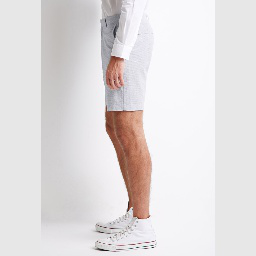

In [5]:
image = tf.keras.preprocessing.image.load_img('img/MEN/Shorts/id_00000056/01_1_front.jpg')
image

In [6]:
img_path = os.path.join("img")
classes = os.listdir(img_path)
count = 0
for c in classes:
    count = count+len(os.listdir(img_path+"/"+c))
print(count)
print(classes)

23
['MEN', 'WOMEN']


In [10]:
img_path_men = os.path.join("img/MEN")
classes = os.listdir(img_path_men)
count = 0
for c in classes:
    count = count+len(os.listdir(img_path_men+"/"+c))
print(count)
print(classes)

951
['Pants', 'Suiting', 'Sweaters', 'Tees_Tanks', 'Sweatshirts_Hoodies', 'Shirts_Polos', 'Jackets_Vests', 'Shorts', 'Denim']


In [11]:
img_path_women = os.path.join("img/WOMEN")
classes = os.listdir(img_path_women)
count = 0
for c in classes:
    count = count+len(os.listdir(img_path_women+"/"+c))
print(count)
print(classes)

7131
['Graphic_Tees', 'Pants', 'Skirts', 'Jackets_Coats', 'Dresses', 'Cardigans', 'Sweaters', 'Tees_Tanks', 'Rompers_Jumpsuits', 'Sweatshirts_Hoodies', 'Shorts', 'Blouses_Shirts', 'Denim', 'Leggings']


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

train_data = train_gen.flow_from_directory(
    img_path, 
    target_size=(150, 150),
    batch_size = 64, 
    class_mode = "categorical" ,
    classes  = ['MEN','WOMEN'],
    shuffle = True,
)

Found 52712 images belonging to 2 classes.


(64, 150, 150, 3) (64, 2)


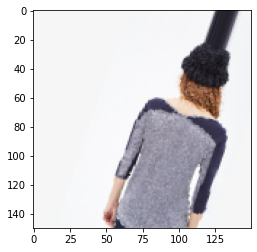

In [14]:
x, y = next(train_data)
print(x.shape,y.shape)
plt.imshow(x[0])


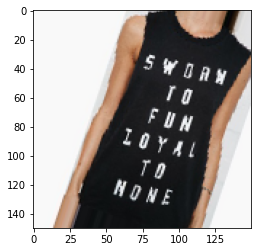

In [22]:
plt.imshow(x[50])

In [15]:
def plot_images(img,labels):
    plt.figure(figsize=(15,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i])
        plt.title(classes[np.argmax(labels[i])])
        plt.axis('off')

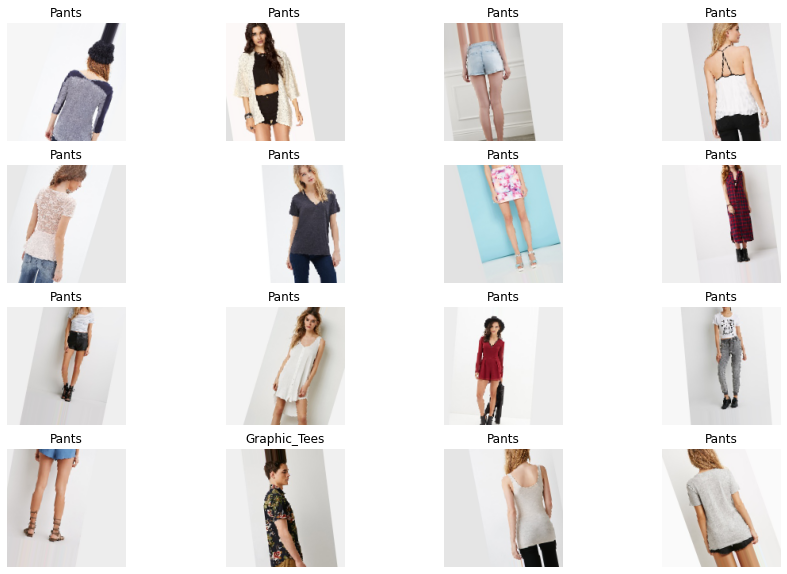

In [19]:
plot_images(x,y)